In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

train_path='../data/UNSW_NB15_training-set.csv'
test_path='../data/UNSW_NB15_testing-set.csv'

df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

print(f"training set: {df_train.shape}")
print(f"Testing set: {df_test.shape}")

training set: (82332, 45)
Testing set: (175341, 45)


In [4]:
df_train.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,254,0,180363632.0,0.0,0,0,0.011,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,248,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,254,0,881000000.0,0.0,0,0,0.008,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,881,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,254,0,854400000.0,0.0,0,0,0.005,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,534,0,0,0,3,2,1,1,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,254,0,600000000.0,0.0,0,0,0.006,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,450,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,254,0,850400000.0,0.0,0,0,0.010,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,1063,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0


In [6]:
print("Binary Label Distribution (0 = Normal, 1 = Attack):")
print(df_train['label'].value_counts())

print("\nAttack Category Breakdown:")
print(df_train['attack_cat'].value_counts())


Binary Label Distribution (0 = Normal, 1 = Attack):
label
1    45332
0    37000
Name: count, dtype: int64

Attack Category Breakdown:
attack_cat
Normal            37000
Generic           18871
Exploits          11132
Fuzzers            6062
DoS                4089
Reconnaissance     3496
Analysis            677
Backdoor            583
Shellcode           378
Worms                44
Name: count, dtype: int64


C:\Users\mahas\AppData\Local\Temp\ipykernel_34092\3244810343.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_train, y='attack_cat', order=df_train['attack_cat'].value_counts().index, palette='coolwarm' )


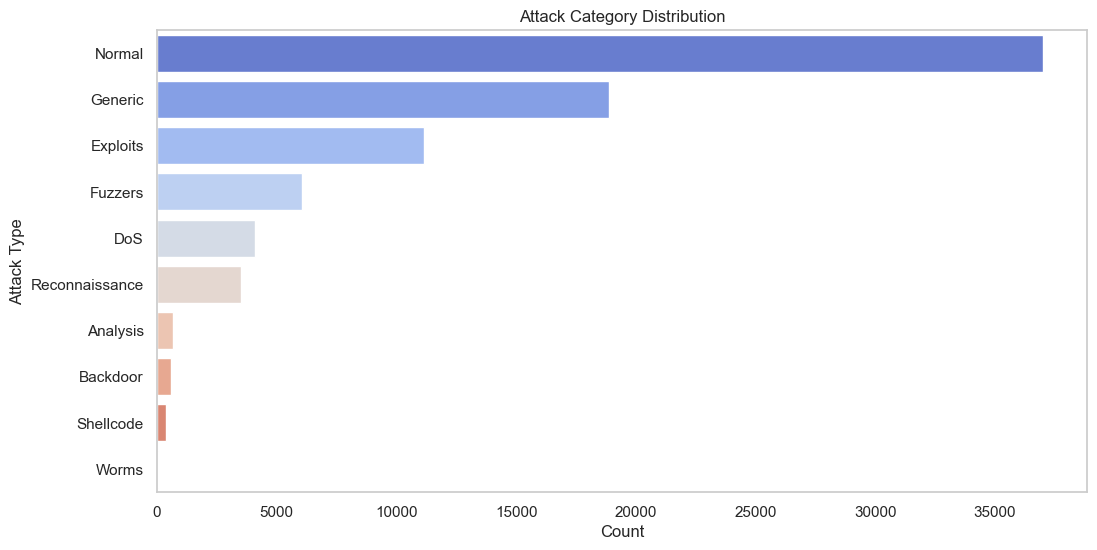

In [8]:
plt.figure(figsize=(12,6))
sns.countplot(data=df_train, y='attack_cat', order=df_train['attack_cat'].value_counts().index, palette='coolwarm' )
plt.title("Attack Category Distribution")
plt.xlabel("Count")
plt.ylabel("Attack Type")
plt.grid(axis='x')
plt.show()

In [10]:
#drop unnecessary columns
df_train_cleaned = df_train.drop(columns=['id', 'attack_cat'])
df_test_cleaned = df_test.drop(columns=['id', 'attack_cat'])

In [11]:
df_train_cleaned.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
0,0.000011,udp,-,INT,2,0,496,0,90909.0902,254,0,180363632.0,0.0,0,0,0.011,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,248,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,0
1,0.000008,udp,-,INT,2,0,1762,0,125000.0003,254,0,881000000.0,0.0,0,0,0.008,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,881,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,0
2,0.000005,udp,-,INT,2,0,1068,0,200000.0051,254,0,854400000.0,0.0,0,0,0.005,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,534,0,0,0,3,2,1,1,1,3,0,0,0,1,3,0,0
3,0.000006,udp,-,INT,2,0,900,0,166666.6608,254,0,600000000.0,0.0,0,0,0.006,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,450,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,0
4,0.000010,udp,-,INT,2,0,2126,0,100000.0025,254,0,850400000.0,0.0,0,0,0.010,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,1063,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,0


In [12]:
#checking for missing values
print("Missing Values in train data:\n", df_train_cleaned.isnull().sum())
print("Missing Values in test data:\n", df_test_cleaned.isnull().sum())

Missing Values in train data:
 dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
lab

In [14]:
#Encoding the categorical features

import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

#Separating fetaures and labels
X=df_train.drop(['attack_cat', 'label'], axis = 1)
y = df_train['label']

# Preprocessing for categorical columns
def encode_categorical(df, categorical_columns):
    inputs ={}
    encoded_features =[]

    for col in categorical_columns:
        inp = tf.keras.Input(shape=(1, ), name=col, dtype=tf.string)
        lookup = tf.keras.layers.StringLookup(output_mode='one_hot')
        encoded_col = lookup(inp)
        encoded_features.append(encoded_col)

    return inputs, encoded_features


# Encoding numeric columns separately using normalization
def encode_numeric(df, numeric_columns):
    scaler = MinMaxScaler()
    df[numeric_columns]= scaler.fit_transform(df[numeric_columns])
    return df[numeric_columns]

# List columns
categorical_cols = ['proto', 'service', 'state']
numeric_cols = [col for col in X.columns if col not in categorical_cols]

# Normalize numeric features
X_numeric_scaled = encode_numeric(X.copy(), numeric_cols)

# Store for model building later
X_scaled_full = pd.concat([X_numeric_scaled, X[categorical_cols]], axis=1)

In [15]:
#Train-Test Split for Binary Classification

from sklearn.model_selection import train_test_split

# Features to use (remove target columns)
X = df_train.drop(['label', 'attack_cat'], axis=1)
y = df_train['label']  # Binary label

# Split into train and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Show the shape of the splits
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Labels Shape:", y_train.shape)
print("Testing Labels Shape:", y_test.shape)


Training Features Shape: (65865, 43)
Testing Features Shape: (16467, 43)
Training Labels Shape: (65865,)
Testing Labels Shape: (16467,)


In [16]:
#Handling Class Imbalance

from sklearn.utils import class_weight
import numpy as np

# Computing class weights from training labels
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

# Converting to dict for TensorFlow usage
class_weights_dict = dict(enumerate(class_weights))
print(class_weights_dict)

{0: np.float64(1.1125844594594594), 1: np.float64(0.9081069902109472)}


In [17]:
# Numerical features to normalize
NUMERIC_FEATURES = [
    'dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl',
    'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit',
    'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat',
    'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src',
    'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
    'ct_dst_src_ltm', 'ct_src_ltm', 'ct_srv_dst'
]

# Categorical features to one-hot encode
CATEGORICAL_FEATURES = ['proto', 'service', 'state']


In [20]:
from tensorflow.keras.layers import Input, Normalization, Concatenate
# Define input placeholders
inputs = {}
for name in NUMERIC_FEATURES:
    inputs[name] = tf.keras.Input(shape=(1,), name=name)
for name in CATEGORICAL_FEATURES:
    inputs[name] = tf.keras.Input(shape=(1,), name=name, dtype=tf.string)

# Step 2: Normalize numeric features
numeric_inputs = [inputs[name] for name in NUMERIC_FEATURES]
concat_numeric = Concatenate()(numeric_inputs)

normalizer = Normalization()
normalized_numeric = normalizer(concat_numeric)

In [ ]:
from tensorflow.keras.layers import Input, Normalization, StringLookup, Concatenate
from tensorflow.keras.models import Model

inputs = {}

# Numeric inputs
for col in numeric_cols:
    inputs[col] = Input(shape=(1,), name=col)

# Categorical inputs
for col in categorical_cols:
    inputs[col] = Input(shape=(1,), name=col, dtype=tf.string)


In [ ]:
# Concatenating all numeric inputs
numeric_inputs = [inputs[col] for col in numeric_cols]
numeric_concat = Concatenate()(numeric_inputs)

# Normalize
normalizer = Normalization()
normalized_numeric = normalizer(numeric_concat)


In [23]:
# Fit the normalizer to numeric data (as numpy array)
normalizer.adapt(X_train[numeric_cols].values)


In [24]:
encoded_categoricals = []

for col in categorical_cols:
    lookup = StringLookup(output_mode='one_hot')
    lookup.adapt(X_train[col])

    encoded_col = lookup(inputs[col])
    encoded_categoricals.append(encoded_col)


In [25]:
# Concatenate all preprocessed features
all_preprocessed = Concatenate()([normalized_numeric] + encoded_categoricals)


In [26]:
preprocessing_model = Model(inputs=inputs, outputs=all_preprocessed)


In [27]:

from tensorflow.keras.layers import Normalization, Concatenate, Input, StringLookup
from sklearn.preprocessing import MinMaxScaler

# Separate features & labels again
X = df_train.drop(['attack_cat', 'label'], axis=1)
y = df_train['label']

# Categorical and numeric column lists
CATEGORICAL_FEATURES = ['proto', 'service', 'state']
NUMERIC_FEATURES = [col for col in X.columns if col not in CATEGORICAL_FEATURES]

# Inputs dictionary
inputs = {}

# Encoded categorical features
encoded_features = []

for col in CATEGORICAL_FEATURES:
    inp = Input(shape=(1,), name=col, dtype=tf.string)
    lookup = StringLookup(output_mode='one_hot')
    encoded_col = lookup(inp)
    inputs[col] = inp
    encoded_features.append(encoded_col)

# Normalized numeric features
for col in NUMERIC_FEATURES:
    inp = Input(shape=(1,), name=col, dtype=tf.float32)
    normalizer = Normalization()
    normalizer.adapt(np.array(X[col]).reshape(-1, 1))
    norm_col = normalizer(inp)
    inputs[col] = inp
    encoded_features.append(norm_col)

# Final preprocessing layer output
preprocessed_inputs = Concatenate()(encoded_features)

# Save this input/output for model
preprocessing_model = tf.keras.Model(inputs=inputs, outputs=preprocessed_inputs)

print("✅ Preprocessing pipeline created successfully.")


✅ Preprocessing pipeline created successfully.


In [31]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Model

# Split input columns
categorical_cols = ['proto', 'service', 'state']
numeric_cols = [col for col in X.columns if col not in categorical_cols]

inputs = {}
encoded_features = []

# 🔷 Categorical features
for col in categorical_cols:
    input_layer = Input(shape=(1,), name=col, dtype=tf.string)
    lookup = StringLookup(output_mode='one_hot')
    lookup.adapt(X[col])  # <-- ADAPT here
    encoded = lookup(input_layer)
    inputs[col] = input_layer
    encoded_features.append(encoded)

# 🔶 Numeric features
for col in numeric_cols:
    input_layer = Input(shape=(1,), name=col, dtype=tf.float32)
    normalizer = Normalization()
    normalizer.adapt(np.array(X[col]).reshape(-1, 1))  # <-- ADAPT here
    encoded = normalizer(input_layer)
    inputs[col] = input_layer
    encoded_features.append(encoded)

# 🧱 Concatenate everything
all_features = Concatenate()(encoded_features)

# 🧠 Neural Network
x = Dense(128, activation='relu')(all_features)
x = Dropout(0.3)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(1, activation='sigmoid')(x)

# 🏗️ Model
model = Model(inputs=inputs, outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# ✅ Summary
model.summary()



Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ proto (InputLayer)  │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ service             │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ state (InputLayer)  │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ id (InputLayer)     │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dur (InputLayer)    │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ spkts (InputLayer)  │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dpkts (InputLayer)  │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sbytes (InputLayer) │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dbytes (InputLayer) │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rate (InputLayer)   │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sttl (InputLayer)   │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dttl (InputLayer)   │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sload (InputLayer)  │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dload (InputLayer)  │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sloss (InputLayer)  │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dloss (InputLayer)  │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sinpkt (InputLayer) │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dinpkt (InputLayer) │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sjit (InputLayer)   │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ djit (InputLayer)   │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ swin (InputLayer)   │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stcpb (InputLayer)  │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dtcpb (InputLayer)  │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dwin (InputLayer)   │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 33,401 (130.63 KB)

 Trainable params: 33,281 (130.00 KB)

 Non-trainable params: 120 (640.00 B)

In [32]:
# Convert Pandas to dict for Keras model input
train_dict = {col: X_train[col].values for col in X.columns}
test_dict = {col: X_test[col].values for col in X.columns}


In [33]:
class_weights = {0: 1.1125844594594594, 1: 0.9081069902109472}


In [34]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)


In [35]:
history = model.fit(
    train_dict,
    y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=512,
    class_weight=class_weights,
    callbacks=[early_stop]
)


Epoch 1/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7877 - loss: 0.4303 - val_accuracy: 0.9476 - val_loss: 0.1330
Epoch 2/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9386 - loss: 0.1511 - val_accuracy: 0.9516 - val_loss: 0.1091
Epoch 3/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9507 - loss: 0.1182 - val_accuracy: 0.9619 - val_loss: 0.0935
Epoch 4/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9584 - loss: 0.1027 - val_accuracy: 0.9689 - val_loss: 0.0775
Epoch 5/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9634 - loss: 0.0889 - val_accuracy: 0.9762 - val_loss: 0.0665
Epoch 6/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9715 - loss: 0.0726 - val_accuracy: 0.9825 - val_loss: 0.0529
Epoch 7/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9794 - loss: 0.0594 - val_accuracy: 0.9872 - val_loss: 0.0464
Epoch 8/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9828 - loss: 0.0524 - val_accuracy: 0

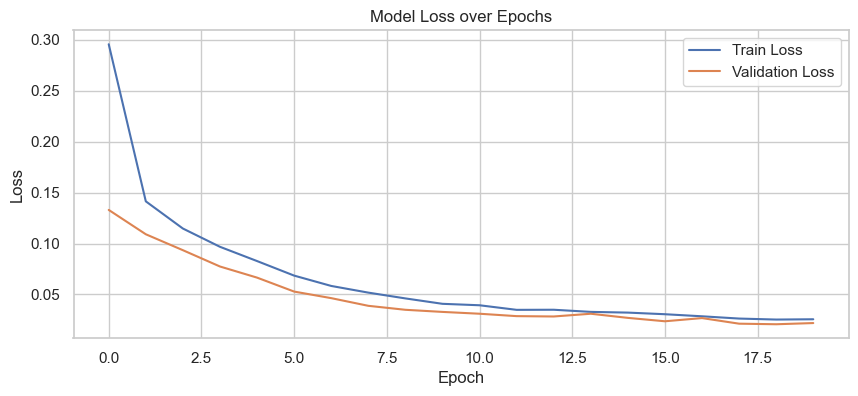

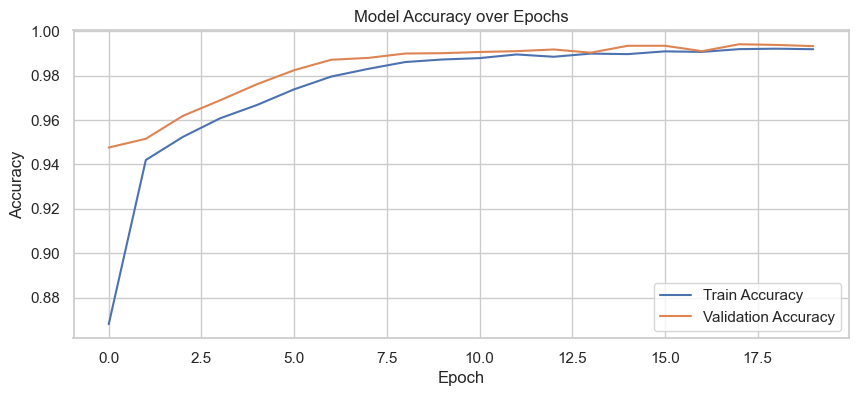

In [36]:
import matplotlib.pyplot as plt

# Plot loss
plt.figure(figsize=(10,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot accuracy
plt.figure(figsize=(10,4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [37]:
# Evaluate model performance
test_metrics = model.evaluate(test_dict, y_test, verbose=2)
print(f"Test Loss: {test_metrics[0]:.4f}")
print(f"Test Accuracy: {test_metrics[1]:.4f}")


515/515 - 1s - 2ms/step - accuracy: 0.9938 - loss: 0.0229
Test Loss: 0.0229
Test Accuracy: 0.9938


515/515 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      7400
           1       0.99      1.00      0.99      9067

    accuracy                           0.99     16467
   macro avg       0.99      0.99      0.99     16467
weighted avg       0.99      0.99      0.99     16467



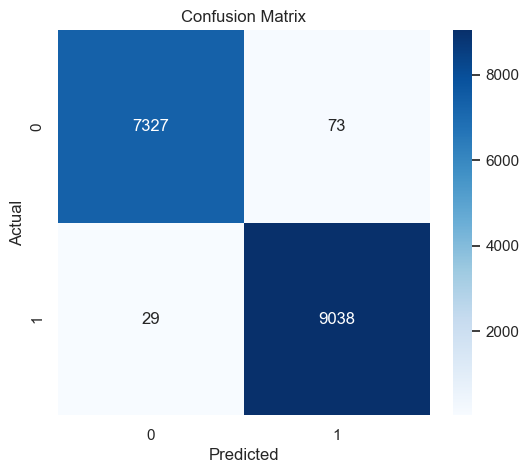

In [39]:
#Classification reports and confusion matrix

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Predict labels
y_pred_probs = model.predict(test_dict)
y_pred = (y_pred_probs > 0.5).astype(int)

# Report
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [40]:
model.save("rogueshield_intrusion_model.h5")
